In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
afr = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Unsupervised\NLP\AmazonFoodReviews.csv' )

In [4]:
afr.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
afr.shape

(568454, 10)

In [6]:
afr = afr.loc[:, ['Score', 'Text']]

In [7]:
afr.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [8]:
afr.Text = afr.Text.str.lower()

In [9]:
afr.Text

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price.  there was a wid...
                                ...                        
568449    great for sesame chicken..this is a good if no...
568450    i'm disappointed with the flavor. the chocolat...
568451    these stars are small, so you can give 10-15 o...
568452    these are the best treats for training and rew...
568453    i am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [10]:
from nltk.corpus import stopwords

In [11]:
import string

In [12]:
l1 = stopwords.words('english')

In [13]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in l1]

In [14]:
afr.Text = text_process(afr.Text)

# Wrong coding
# Correct one --> afr.Text.apply(text_process)

ValueError: Length of values (24351591) does not match length of index (568454)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer(analyzer= text_process).fit(afr['Text'])


In [17]:
# or this way 
# cv = CountVectorizer(analyzer= text_process).fit(afr.Text)


In [18]:
cv.vocabulary_

{'bought': 35857,
 'several': 191850,
 'vitality': 229827,
 'canned': 42395,
 'dog': 69985,
 'food': 87189,
 'products': 172594,
 'found': 88450,
 'good': 95108,
 'quality': 175518,
 'product': 172343,
 'looks': 132324,
 'like': 130309,
 'stew': 204098,
 'processed': 172170,
 'meat': 137919,
 'smells': 196972,
 'better': 31728,
 'labrador': 127070,
 'finicky': 84290,
 'appreciates': 23175,
 'arrived': 24124,
 'labeled': 126924,
 'jumbo': 123471,
 'salted': 186534,
 'peanutsthe': 162728,
 'peanuts': 162695,
 'actually': 15812,
 'small': 196667,
 'sized': 195465,
 'unsalted': 225858,
 'sure': 208961,
 'error': 77454,
 'vendor': 228603,
 'intended': 119211,
 'represent': 181173,
 'confection': 55158,
 'around': 24006,
 'centuries': 45428,
 'light': 130088,
 'pillowy': 165773,
 'citrus': 50548,
 'gelatin': 92424,
 'nuts': 152690,
 'case': 44135,
 'filberts': 83761,
 'cut': 61676,
 'tiny': 218077,
 'squares': 202312,
 'liberally': 129676,
 'coated': 51763,
 'powdered': 169667,
 'sugar': 207

In [19]:
len(cv.vocabulary_)

240626

In [20]:
tdm = cv.transform(afr.Text)

In [21]:
tdm.shape

(568454, 240626)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(tdm, afr.Score, test_size = .2)

In [24]:
print(x_train.shape)
print(y_train.shape)
print('------')
print(x_test.shape)
print(y_test.shape)


(454763, 240626)
(454763,)
------
(113691, 240626)
(113691,)


In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB()

In [27]:
nb.fit(x_train, y_train)

MultinomialNB()

In [28]:
pred = nb.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
tab = confusion_matrix(y_test, pred)
tab

array([[ 6594,   319,   569,   518,  2503],
       [ 1344,   811,   753,   943,  2050],
       [  970,   152,  2042,  2044,  3319],
       [  634,    71,   520,  5906,  8955],
       [ 1437,   196,   525,  4594, 65922]], dtype=int64)

In [31]:
Accuracy = accuracy_score(y_test, pred)
Accuracy

0.7148762874809792

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
linreg = LogisticRegression()


In [34]:
linreg.fit(x_train, y_train)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred_linreg = linreg.predict(x_test)


In [36]:
tab_linreg = confusion_matrix(y_test, pred_linreg)

In [37]:
tab_linreg

array([[ 7204,   702,   443,   204,  1950],
       [ 1407,  1768,   773,   345,  1608],
       [  796,   668,  2862,  1180,  3021],
       [  371,   276,   956,  4868,  9615],
       [  749,   324,   646,  2314, 68641]], dtype=int64)

In [38]:
print('Accuracy from Logistic -- >', accuracy_score(y_test, pred_linreg))

Accuracy from Logistic -- > 0.7506574838817497


In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

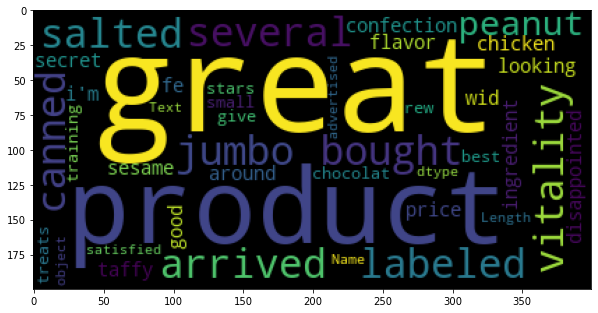

In [40]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(afr['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [41]:
afr.head()

,Score,Text
0,5,i have bought several of the vitality canned d...
1,1,product arrived labeled as jumbo salted peanut...
2,4,this is a confection that has been around a fe...
3,2,if you are looking for the secret ingredient i...
4,5,great taffy at a great price. there was a wid...


In [42]:
afr.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [43]:
Score1 = afr[afr.Score == 1]
Score2 = afr[afr.Score == 2]
Score3 = afr[afr.Score == 3]
Score4 = afr[afr.Score == 4]
Score5 = afr[afr.Score == 5]

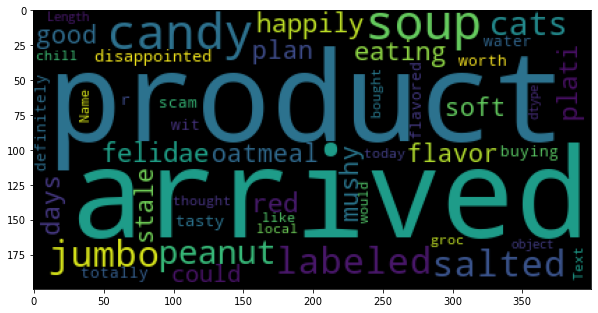

In [44]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(Score1['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

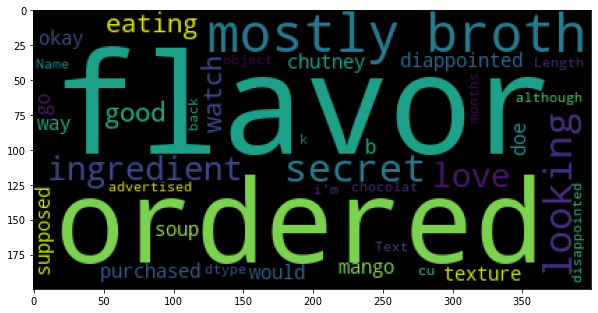

In [45]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(Score2['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

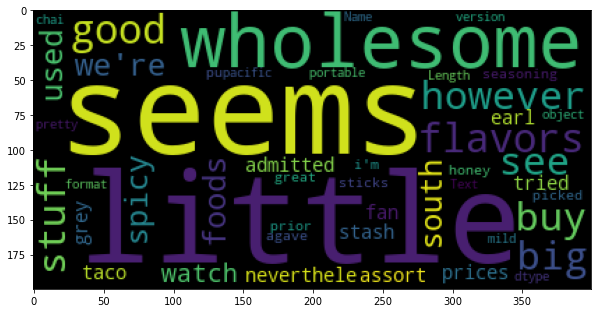

In [46]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(Score3['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

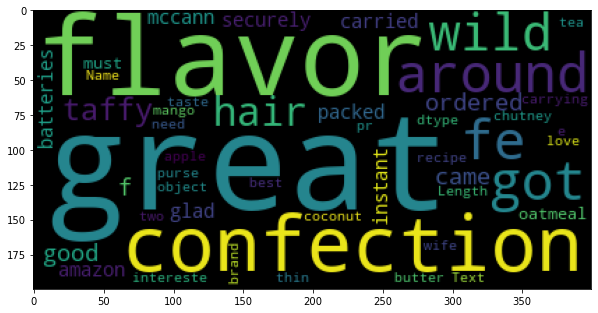

In [47]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(Score4['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

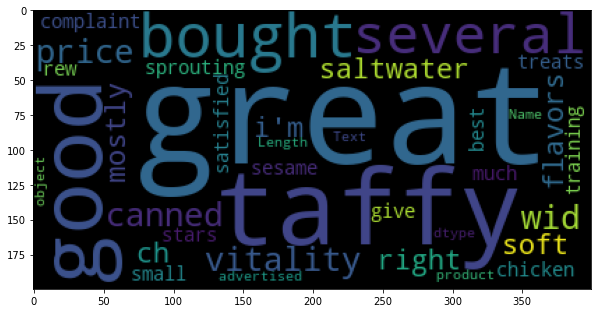

In [48]:
cloud = WordCloud(stopwords= stopwords.words('english'), max_words= 50).generate(str(Score5['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [49]:
# If we want to create 3 classes in score --> 1,2,3
# Score 1&2 --> 1 Negative feedback
# Score 3 --> 2 Neutral
# Score 4&5 --> 3 Positive feedback

In [50]:
afr.Score = afr.Score.replace({2: 1})

In [51]:
afr.Score.value_counts()

5    363122
1     82037
4     80655
3     42640
Name: Score, dtype: int64

In [52]:
afr.Score = afr.Score.replace({3: 2})

In [53]:
afr.Score = afr.Score.replace({4: 3, 5: 3})

In [54]:
afr.Score.value_counts()

3    443777
1     82037
2     42640
Name: Score, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(tdm, afr.Score, test_size = .2)

In [56]:
print(x_train.shape)
print(y_train.shape)
print('------')
print(x_test.shape)
print(y_test.shape)


(454763, 240626)
(454763,)
------
(113691, 240626)
(113691,)


In [57]:
nb.fit(x_train, y_train)

MultinomialNB()

In [58]:
pred = nb.predict(x_test)

In [59]:
tab = confusion_matrix(y_test, pred)

In [60]:
tab

array([[10642,  1008,  4686],
       [ 1732,  2249,  4638],
       [ 3210,  2095, 83431]], dtype=int64)

In [61]:
Accuracy = accuracy_score(y_test, pred)*100
Accuracy

84.72262536172607

In [62]:
linreg.fit(x_train, y_train)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
pred_linreg = linreg.predict(x_test)

In [64]:
tab_linreg = confusion_matrix(y_test, pred_linreg)
tab_linreg

array([[11587,   862,  3887],
       [ 1634,  2778,  4207],
       [ 1888,  1315, 85533]], dtype=int64)

In [65]:
Accuracy_linreg = accuracy_score(y_test, pred_linreg)*100
Accuracy_linreg

87.86799306893246

In [66]:
from sklearn.metrics import classification_report

In [67]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           1       0.68      0.65      0.67     16336\n           2       0.42      0.26      0.32      8619\n           3       0.90      0.94      0.92     88736\n\n    accuracy                           0.85    113691\n   macro avg       0.67      0.62      0.64    113691\nweighted avg       0.83      0.85      0.84    113691\n'

In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.68      0.65      0.67     16336
           2       0.42      0.26      0.32      8619
           3       0.90      0.94      0.92     88736

    accuracy                           0.85    113691
   macro avg       0.67      0.62      0.64    113691
weighted avg       0.83      0.85      0.84    113691

